In [107]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt 

data_dir = r"C:\Users\PC\Downloads\CNN\train_data" 
data = tf.keras.utils.image_dataset_from_directory(data_dir, seed = 123, image_size=(180,180), batch_size=16)

print(data.class_names)
class_names = data.class_names

Found 300 files belonging to 3 classes.
['Kacang Almond', 'Kacang Mete', 'Kacang Tanah']


In [108]:
img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=32,
    image_size=(img_size, img_size),
    batch_size=batch,
)

Found 300 files belonging to 3 classes.


In [109]:
total_count = len(dataset)
val_count = int(total_count*validation_split)
train_count = total_count - val_count

print("Total Images: ", total_count)
print("Train Images: ", train_count)
print("Validation Images: ", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

Total Images:  10
Train Images:  9
Validation Images:  1


In [110]:
img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=32,
    image_size=(img_size, img_size),
    batch_size=batch,
)


Found 300 files belonging to 3 classes.


In [111]:
total_count = len(dataset)
val_count = int(total_count*validation_split)
train_count = train_count - val_count

print("Total Images: ", total_count)
print("Train Images: ", train_count)
print("Validation Images: ", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

Total Images:  10
Train Images:  8
Validation Images:  1


In [112]:
from PIL import Image
import os

def verify_images(directory):
    invalid_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                try:
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()
                except Exception as e:
                    invalid_files.append(os.path.join(root, file))
    if invalid_files:
        print("Invalid image files:")
        for file in invalid_files:
            print(file)
    else:
        print("All images are valid.")

base_dir = r'C:\Users\PC\Downloads\CNN\train_data'
verify_images(base_dir)

All images are valid.


In [113]:
def list_all_files(directory):
    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            all_files.append(os.path.join(root, file))
    return all_files

files = list_all_files(base_dir)
print(f"Total files in dataset: {len(files)}")
for file in files[:10]:
    print(file)


Total files in dataset: 300
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA1.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA10.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA100.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA11.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA12.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA13.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA14.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA15.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA16.jpg
C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA17.jpg


In [114]:
from PIL import Image
import os

def convert_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                try:
                    image_path = os.path.join(root, file)
                    with Image.open(image_path) as img:
                        new_image_path = image_path.replace(file, file.split('.')[0] + '.jpg')
                        img.convert('RGB').save(new_image_path, 'JPEG')
                        print(f"Converted: {image_path} -> {new_image_path}")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

base_dir = r'C:\Users\PC\Downloads\CNN\train_data'
convert_images(base_dir)


Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA1.jpg -> C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA1.jpg
Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA10.jpg -> C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA10.jpg
Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA100.jpg -> C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA100.jpg
Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA11.jpg -> C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA11.jpg
Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA12.jpg -> C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA12.jpg
Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA13.jpg -> C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA13.jpg
Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA14.jpg -> C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\KA14.jpg
Converted: C:\Users\PC\Downloads\CNN\train_data\Kacang Almond\

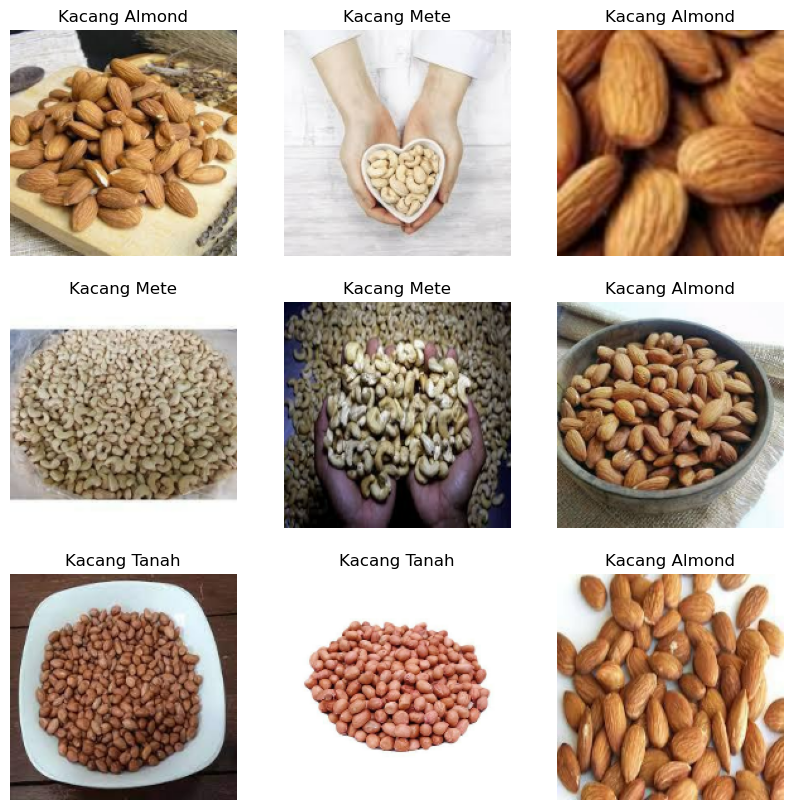

In [ ]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


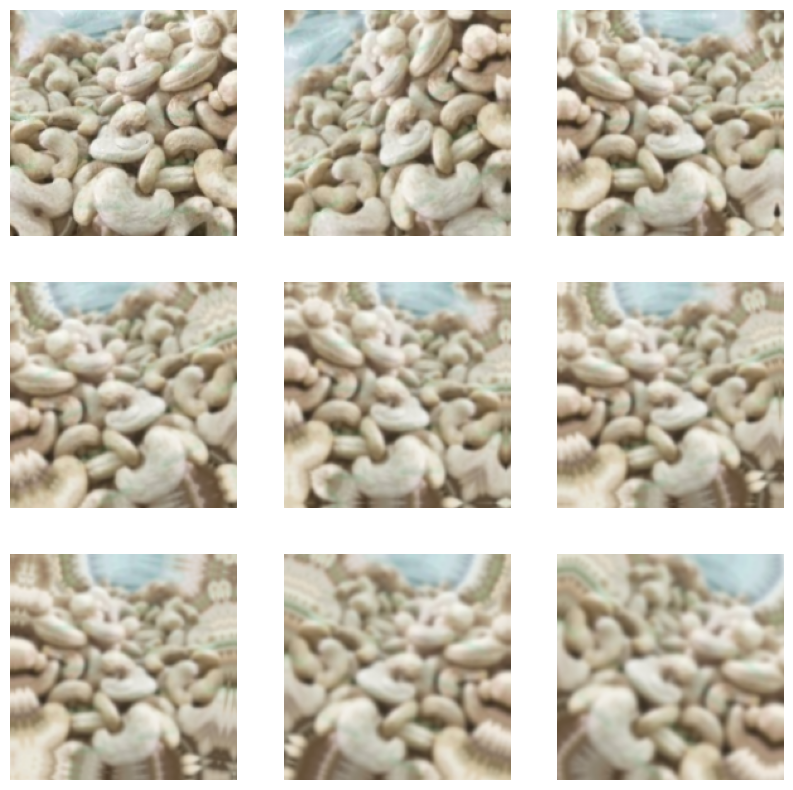

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
import tensorflow as tf
import keras

import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout

from keras._tf_keras.keras.models import load_model

def googlenet(input_shape, n_classes):
    
    def inception_block(x, f):
        t1 = Conv2D(f[0], 1, activation='relu')(x)

        t2 = Conv2D(f[1], 1, activation='relu')(x)
        t2 = Conv2D(f[2], 3, padding='same', activation='relu')(t2)
 
        t3 = Conv2D(f[3], 1, activation='relu')(x)
        t3 = Conv2D(f[4], 5, padding='same', activation='relu')(t3)

        t4 = MaxPool2D(3, 1, padding='same')(x)
        t4 = Conv2D(f[5], 1, activation='relu')(t4)

        output = Concatenate()([t1, t2, t3, t4])
        return output
  
  
    input = Input(input_shape)
    
    x = Conv2D(64, 7, strides=2, padding='same', activation='relu')(input)
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    x = Conv2D(64, 1, activation='relu')(x)
    x = Conv2D(192, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(3, strides=2)(x)
    
    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPool2D(3, strides=2, padding='same')(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])
    
    x = AvgPool2D(3, strides=1)(x)
    x = Dropout(0.4)(x)
  
    x = Flatten()(x)
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    return model
input_shape = 180, 180, 3   
n_classes = 2             

K.clear_session()

model = googlenet(input_shape, n_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 90, 90,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 45, 45,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 45, 45,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 45, 45,    │    110,784 │ conv2d_1[0][0]    │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 22, 22,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 22, 22,    │     18,528 │ max_pooling2d_1[… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 22, 22,    │      3,088 │ max_pooling2d_1[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 22, 22,    │          0 │ max_pooling2d_1[… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 22, 22,    │     12,352 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 22, 22,    │    110,720 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 22, 22,    │     12,832 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 22, 22,    │      6,176 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 22, 22,    │          0 │ conv2d_3[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_7[0][0],   │
│                     │                   │            │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 22, 22,    │     32,896 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 22, 22,    │      8,224 │ concatenate[0][0] │
│                     │ 32)               │            │                 

 Total params: 6,006,322 (22.91 MB)

 Trainable params: 6,006,322 (22.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np

model = Sequential([
    Flatten(input_shape=(180, 180, 3)),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='max'
)

history = model.fit(
    train_ds, 
    epochs=30, 
    validation_data=val_ds, 
    callbacks=[early_stopping]
)

Epoch 1/30


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.3185 - loss: 15332.8311 - val_accuracy: 0.4091 - val_loss: 609.9547
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3204 - loss: 3997.1213 - val_accuracy: 0.4091 - val_loss: 1565.5082
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4285 - loss: 1844.3956 - val_accuracy: 0.5682 - val_loss: 622.5387
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5320 - loss: 1156.9677 - val_accuracy: 0.5227 - val_loss: 1942.3004
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5856 - loss: 1437.0381 - val_accuracy: 0.4773 - val_loss: 992.5567
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6439 - loss: 902.8458 - val_accuracy: 0.7955 - val_loss: 344.0068
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6502 - loss: 638.4806 - val_accuracy: 0.5227 - val_loss: 1361.4243
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6297 - loss: 1086.7289 - val_accurac

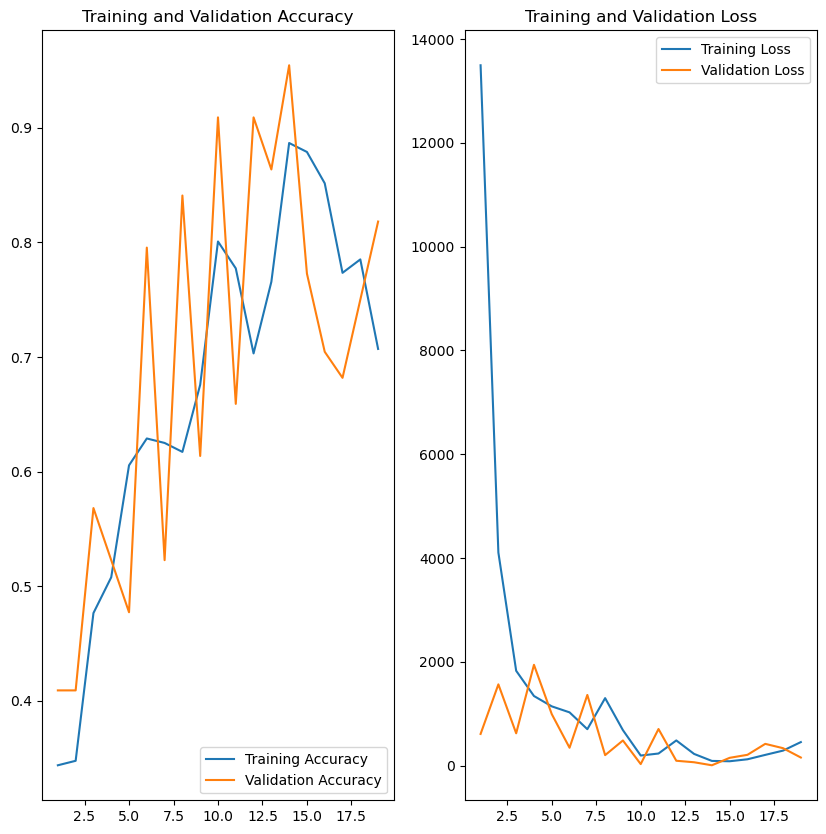

In [ ]:
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [121]:
model.save('gugelnet.h5')

In [122]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

model = load_model(r'gugelnet.h5')
class_names = ['Kacang Almond', 'Kacang Mete', 'Kacang Tanah']

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r'C:\Users\PC\Downloads\CNN\test_data\Validation Kacang Mete/image 3.jpg', save_path='image 3.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Prediksi: Kacang Mete
Confidence: 57.61%
Prediksi: Kacang Mete dengan confidence 57.61%. Gambar asli disimpan di image 3.jpg.


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


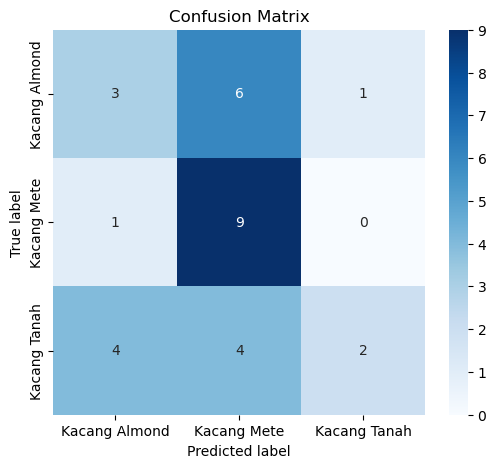

Confusion Matrix:
 [[3 6 1]
 [1 9 0]
 [4 4 2]]
Akurasi: 0.4666666666666667
Presisi: [0.375      0.47368421 0.66666667]
Recall: [0.3 0.9 0.2]
F1 Score: [0.33333333 0.62068966 0.30769231]


In [123]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\PC\Downloads\CNN\test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180)
)

y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Kacang Almond", "Kacang Mete", "Kacang Tanah"], yticklabels=["Kacang Almond", "Kacang Mete", "Kacang Tanah"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())